In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as pix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier,Dataset, plot_importance
from sklearn.metrics import precision_score,recall_score,roc_auc_score


import shap
shap.initjs()

data_df,labels = shap.datasets.adult(display=True)
#  (False) and > $50K

In [2]:
data_df.dtypes

Age                float32
Workclass         category
Education-Num      float32
Marital Status    category
Occupation        category
Relationship      category
Race              category
Sex               category
Capital Gain       float32
Capital Loss       float32
Hours per week     float32
Country           category
dtype: object

In [3]:
object_features = data_df.select_dtypes('category').columns
encoders_dict ={}
for col in object_features:
    encoders_dict[col] = LabelEncoder()
    encoders_dict[col].fit(data_df[col])
    data_df[col]= encoders_dict[col].transform(data_df[col].map(str))
    

In [4]:

train,val,y_train,y_val = train_test_split(data_df,labels,\
                                           test_size=0.3,random_state=1956)
    

    

In [5]:
params = {'boosting_type': 'dart',
          'max_depth' : 7,
          'objective': 'binary',
          'learning_rate': 0.05,
          'max_bin': 500,
          'subsample': 0.9,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'metric' : 'auc',
          'scale_pos_weight':1.3}

lgbm_model = LGBMClassifier(boosting_type=params['boosting_type'],
                            objective = params['objective'], silent = True,\
                            max_depth = params['max_depth'],\
                            learing_rate = params['learning_rate'],\
                            max_bin = params['max_bin'],\
                            subsample = params['subsample'],\
                            subsample_freq = params['subsample_freq'],\
                            colsample_bytree =params['colsample_bytree'],\
                            n_estimators=1000,
                            scale_pos_weight = params['scale_pos_weight']
)

lgbm_model.fit(train,y_train,eval_set=[(train,y_train),(val,y_val)],eval_metric=\
              params['metric'],early_stopping_rounds=50)
    

[1]	training's binary_logloss: 0.509569	training's auc: 0.903239	valid_1's binary_logloss: 0.504736	valid_1's auc: 0.89541
[2]	training's binary_logloss: 0.480305	training's auc: 0.909396	valid_1's binary_logloss: 0.476856	valid_1's auc: 0.901891
[3]	training's binary_logloss: 0.456896	training's auc: 0.913353	valid_1's binary_logloss: 0.45466	valid_1's auc: 0.906141
[4]	training's binary_logloss: 0.435034	training's auc: 0.914206	valid_1's binary_logloss: 0.434134	valid_1's auc: 0.906839
[5]	training's binary_logloss: 0.416701	training's auc: 0.914949	valid_1's binary_logloss: 0.416886	valid_1's auc: 0.907039
[6]	training's binary_logloss: 0.400922	training's auc: 0.916187	valid_1's binary_logloss: 0.40237	valid_1's auc: 0.907481
[7]	training's binary_logloss: 0.388284	training's auc: 0.916485	valid_1's binary_logloss: 0.390734	valid_1's auc: 0.907613
[8]	training's binary_logloss: 0.394214	training's auc: 0.916106	valid_1's binary_logloss: 0.396275	valid_1's auc: 0.907162
[9]	trainin

/home/oussama/anaconda3/lib/python3.6/site-packages/lightgbm/callback.py:189: UserWarning:

Early stopping is not available in dart mode



[53]	training's binary_logloss: 0.29219	training's auc: 0.932406	valid_1's binary_logloss: 0.304591	valid_1's auc: 0.920601
[54]	training's binary_logloss: 0.290611	training's auc: 0.932485	valid_1's binary_logloss: 0.303291	valid_1's auc: 0.920656
[55]	training's binary_logloss: 0.289125	training's auc: 0.932755	valid_1's binary_logloss: 0.302096	valid_1's auc: 0.920773
[56]	training's binary_logloss: 0.290025	training's auc: 0.932785	valid_1's binary_logloss: 0.302724	valid_1's auc: 0.920826
[57]	training's binary_logloss: 0.288813	training's auc: 0.93287	valid_1's binary_logloss: 0.301917	valid_1's auc: 0.920741
[58]	training's binary_logloss: 0.294376	training's auc: 0.932991	valid_1's binary_logloss: 0.307487	valid_1's auc: 0.920837
[59]	training's binary_logloss: 0.295142	training's auc: 0.933061	valid_1's binary_logloss: 0.308006	valid_1's auc: 0.920894
[60]	training's binary_logloss: 0.293472	training's auc: 0.933046	valid_1's binary_logloss: 0.3067	valid_1's auc: 0.92078
[61]	

[141]	training's binary_logloss: 0.279423	training's auc: 0.936987	valid_1's binary_logloss: 0.296624	valid_1's auc: 0.922677
[142]	training's binary_logloss: 0.279907	training's auc: 0.936976	valid_1's binary_logloss: 0.296975	valid_1's auc: 0.922668
[143]	training's binary_logloss: 0.278812	training's auc: 0.937089	valid_1's binary_logloss: 0.296131	valid_1's auc: 0.922701
[144]	training's binary_logloss: 0.27924	training's auc: 0.937069	valid_1's binary_logloss: 0.296446	valid_1's auc: 0.922701
[145]	training's binary_logloss: 0.278222	training's auc: 0.937089	valid_1's binary_logloss: 0.295705	valid_1's auc: 0.922645
[146]	training's binary_logloss: 0.278815	training's auc: 0.937058	valid_1's binary_logloss: 0.296177	valid_1's auc: 0.922611
[147]	training's binary_logloss: 0.279355	training's auc: 0.93704	valid_1's binary_logloss: 0.296582	valid_1's auc: 0.922616
[148]	training's binary_logloss: 0.279875	training's auc: 0.937051	valid_1's binary_logloss: 0.296958	valid_1's auc: 0.9

[221]	training's binary_logloss: 0.265706	training's auc: 0.941432	valid_1's binary_logloss: 0.289016	valid_1's auc: 0.924062
[222]	training's binary_logloss: 0.265112	training's auc: 0.941564	valid_1's binary_logloss: 0.288676	valid_1's auc: 0.924099
[223]	training's binary_logloss: 0.264524	training's auc: 0.941665	valid_1's binary_logloss: 0.288087	valid_1's auc: 0.924287
[224]	training's binary_logloss: 0.264877	training's auc: 0.941631	valid_1's binary_logloss: 0.288271	valid_1's auc: 0.924274
[225]	training's binary_logloss: 0.265283	training's auc: 0.941584	valid_1's binary_logloss: 0.28852	valid_1's auc: 0.924258
[226]	training's binary_logloss: 0.26559	training's auc: 0.941558	valid_1's binary_logloss: 0.288693	valid_1's auc: 0.924262
[227]	training's binary_logloss: 0.265857	training's auc: 0.941519	valid_1's binary_logloss: 0.288855	valid_1's auc: 0.924241
[228]	training's binary_logloss: 0.265175	training's auc: 0.941635	valid_1's binary_logloss: 0.28828	valid_1's auc: 0.92

[296]	training's binary_logloss: 0.255062	training's auc: 0.945522	valid_1's binary_logloss: 0.284552	valid_1's auc: 0.925374
[297]	training's binary_logloss: 0.254617	training's auc: 0.945707	valid_1's binary_logloss: 0.284419	valid_1's auc: 0.925405
[298]	training's binary_logloss: 0.254825	training's auc: 0.945701	valid_1's binary_logloss: 0.2845	valid_1's auc: 0.92541
[299]	training's binary_logloss: 0.254458	training's auc: 0.945782	valid_1's binary_logloss: 0.284353	valid_1's auc: 0.925438
[300]	training's binary_logloss: 0.254686	training's auc: 0.945755	valid_1's binary_logloss: 0.284458	valid_1's auc: 0.925425
[301]	training's binary_logloss: 0.25511	training's auc: 0.945726	valid_1's binary_logloss: 0.284727	valid_1's auc: 0.925425
[302]	training's binary_logloss: 0.254754	training's auc: 0.945785	valid_1's binary_logloss: 0.284689	valid_1's auc: 0.925381
[303]	training's binary_logloss: 0.255016	training's auc: 0.945751	valid_1's binary_logloss: 0.284799	valid_1's auc: 0.925

[376]	training's binary_logloss: 0.248518	training's auc: 0.948633	valid_1's binary_logloss: 0.283899	valid_1's auc: 0.925521
[377]	training's binary_logloss: 0.248214	training's auc: 0.948733	valid_1's binary_logloss: 0.283766	valid_1's auc: 0.925569
[378]	training's binary_logloss: 0.248426	training's auc: 0.948707	valid_1's binary_logloss: 0.283815	valid_1's auc: 0.925583
[379]	training's binary_logloss: 0.248614	training's auc: 0.94869	valid_1's binary_logloss: 0.283869	valid_1's auc: 0.925587
[380]	training's binary_logloss: 0.248338	training's auc: 0.948741	valid_1's binary_logloss: 0.283848	valid_1's auc: 0.925562
[381]	training's binary_logloss: 0.248529	training's auc: 0.94872	valid_1's binary_logloss: 0.283904	valid_1's auc: 0.925563
[382]	training's binary_logloss: 0.248742	training's auc: 0.948686	valid_1's binary_logloss: 0.283964	valid_1's auc: 0.925559
[383]	training's binary_logloss: 0.248498	training's auc: 0.948727	valid_1's binary_logloss: 0.283711	valid_1's auc: 0.9

[453]	training's binary_logloss: 0.240874	training's auc: 0.951672	valid_1's binary_logloss: 0.283126	valid_1's auc: 0.925556
[454]	training's binary_logloss: 0.241125	training's auc: 0.951655	valid_1's binary_logloss: 0.283238	valid_1's auc: 0.925555
[455]	training's binary_logloss: 0.240794	training's auc: 0.951774	valid_1's binary_logloss: 0.283237	valid_1's auc: 0.925517
[456]	training's binary_logloss: 0.240949	training's auc: 0.951757	valid_1's binary_logloss: 0.283253	valid_1's auc: 0.925515
[457]	training's binary_logloss: 0.241114	training's auc: 0.951723	valid_1's binary_logloss: 0.28327	valid_1's auc: 0.925519
[458]	training's binary_logloss: 0.240814	training's auc: 0.951852	valid_1's binary_logloss: 0.28326	valid_1's auc: 0.925505
[459]	training's binary_logloss: 0.240559	training's auc: 0.951939	valid_1's binary_logloss: 0.283312	valid_1's auc: 0.925445
[460]	training's binary_logloss: 0.240702	training's auc: 0.951931	valid_1's binary_logloss: 0.283341	valid_1's auc: 0.9

[525]	training's binary_logloss: 0.235992	training's auc: 0.954272	valid_1's binary_logloss: 0.283729	valid_1's auc: 0.925144
[526]	training's binary_logloss: 0.235815	training's auc: 0.954305	valid_1's binary_logloss: 0.283717	valid_1's auc: 0.925145
[527]	training's binary_logloss: 0.236039	training's auc: 0.954295	valid_1's binary_logloss: 0.283828	valid_1's auc: 0.925143
[528]	training's binary_logloss: 0.235861	training's auc: 0.95432	valid_1's binary_logloss: 0.283785	valid_1's auc: 0.925155
[529]	training's binary_logloss: 0.235671	training's auc: 0.954353	valid_1's binary_logloss: 0.283789	valid_1's auc: 0.92513
[530]	training's binary_logloss: 0.235499	training's auc: 0.954371	valid_1's binary_logloss: 0.283658	valid_1's auc: 0.925185
[531]	training's binary_logloss: 0.235634	training's auc: 0.954349	valid_1's binary_logloss: 0.283661	valid_1's auc: 0.925185
[532]	training's binary_logloss: 0.235405	training's auc: 0.954416	valid_1's binary_logloss: 0.283616	valid_1's auc: 0.9

[594]	training's binary_logloss: 0.234498	training's auc: 0.955323	valid_1's binary_logloss: 0.283423	valid_1's auc: 0.92521
[595]	training's binary_logloss: 0.234613	training's auc: 0.955312	valid_1's binary_logloss: 0.283428	valid_1's auc: 0.925207
[596]	training's binary_logloss: 0.234303	training's auc: 0.95544	valid_1's binary_logloss: 0.283437	valid_1's auc: 0.925194
[597]	training's binary_logloss: 0.234422	training's auc: 0.955431	valid_1's binary_logloss: 0.283438	valid_1's auc: 0.925203
[598]	training's binary_logloss: 0.234558	training's auc: 0.95541	valid_1's binary_logloss: 0.283451	valid_1's auc: 0.9252
[599]	training's binary_logloss: 0.234373	training's auc: 0.955416	valid_1's binary_logloss: 0.283441	valid_1's auc: 0.925203
[600]	training's binary_logloss: 0.234082	training's auc: 0.955541	valid_1's binary_logloss: 0.283391	valid_1's auc: 0.925228
[601]	training's binary_logloss: 0.233826	training's auc: 0.955613	valid_1's binary_logloss: 0.283394	valid_1's auc: 0.9252

[661]	training's binary_logloss: 0.230247	training's auc: 0.957224	valid_1's binary_logloss: 0.283549	valid_1's auc: 0.925127
[662]	training's binary_logloss: 0.230082	training's auc: 0.957289	valid_1's binary_logloss: 0.283566	valid_1's auc: 0.925135
[663]	training's binary_logloss: 0.230184	training's auc: 0.95728	valid_1's binary_logloss: 0.283564	valid_1's auc: 0.925138
[664]	training's binary_logloss: 0.230392	training's auc: 0.957265	valid_1's binary_logloss: 0.28365	valid_1's auc: 0.925141
[665]	training's binary_logloss: 0.230503	training's auc: 0.957256	valid_1's binary_logloss: 0.283662	valid_1's auc: 0.92514
[666]	training's binary_logloss: 0.230602	training's auc: 0.957252	valid_1's binary_logloss: 0.283657	valid_1's auc: 0.925139
[667]	training's binary_logloss: 0.230721	training's auc: 0.957229	valid_1's binary_logloss: 0.283658	valid_1's auc: 0.925141
[668]	training's binary_logloss: 0.23082	training's auc: 0.957224	valid_1's binary_logloss: 0.283665	valid_1's auc: 0.925

[731]	training's binary_logloss: 0.226708	training's auc: 0.958788	valid_1's binary_logloss: 0.283865	valid_1's auc: 0.924984
[732]	training's binary_logloss: 0.226815	training's auc: 0.958768	valid_1's binary_logloss: 0.283858	valid_1's auc: 0.92499
[733]	training's binary_logloss: 0.226587	training's auc: 0.958833	valid_1's binary_logloss: 0.283814	valid_1's auc: 0.925018
[734]	training's binary_logloss: 0.226685	training's auc: 0.958826	valid_1's binary_logloss: 0.283815	valid_1's auc: 0.925014
[735]	training's binary_logloss: 0.226443	training's auc: 0.958895	valid_1's binary_logloss: 0.283793	valid_1's auc: 0.925019
[736]	training's binary_logloss: 0.226545	training's auc: 0.958883	valid_1's binary_logloss: 0.283797	valid_1's auc: 0.925018
[737]	training's binary_logloss: 0.226618	training's auc: 0.958895	valid_1's binary_logloss: 0.283776	valid_1's auc: 0.925017
[738]	training's binary_logloss: 0.226416	training's auc: 0.958947	valid_1's binary_logloss: 0.283692	valid_1's auc: 0.

[802]	training's binary_logloss: 0.223618	training's auc: 0.960121	valid_1's binary_logloss: 0.283925	valid_1's auc: 0.924944
[803]	training's binary_logloss: 0.223689	training's auc: 0.960123	valid_1's binary_logloss: 0.283915	valid_1's auc: 0.924944
[804]	training's binary_logloss: 0.223775	training's auc: 0.960121	valid_1's binary_logloss: 0.283909	valid_1's auc: 0.924945
[805]	training's binary_logloss: 0.223857	training's auc: 0.96011	valid_1's binary_logloss: 0.283907	valid_1's auc: 0.924943
[806]	training's binary_logloss: 0.223933	training's auc: 0.960108	valid_1's binary_logloss: 0.283894	valid_1's auc: 0.924945
[807]	training's binary_logloss: 0.223722	training's auc: 0.960164	valid_1's binary_logloss: 0.283993	valid_1's auc: 0.924918
[808]	training's binary_logloss: 0.223487	training's auc: 0.960231	valid_1's binary_logloss: 0.284026	valid_1's auc: 0.924896
[809]	training's binary_logloss: 0.223566	training's auc: 0.960228	valid_1's binary_logloss: 0.284021	valid_1's auc: 0.

[873]	training's binary_logloss: 0.219737	training's auc: 0.961699	valid_1's binary_logloss: 0.284996	valid_1's auc: 0.924399
[874]	training's binary_logloss: 0.219882	training's auc: 0.961698	valid_1's binary_logloss: 0.285052	valid_1's auc: 0.924401
[875]	training's binary_logloss: 0.219963	training's auc: 0.961693	valid_1's binary_logloss: 0.28504	valid_1's auc: 0.924401
[876]	training's binary_logloss: 0.219776	training's auc: 0.961745	valid_1's binary_logloss: 0.285027	valid_1's auc: 0.924384
[877]	training's binary_logloss: 0.219848	training's auc: 0.961742	valid_1's binary_logloss: 0.285019	valid_1's auc: 0.92438
[878]	training's binary_logloss: 0.219625	training's auc: 0.96184	valid_1's binary_logloss: 0.285031	valid_1's auc: 0.924387
[879]	training's binary_logloss: 0.2197	training's auc: 0.961834	valid_1's binary_logloss: 0.285032	valid_1's auc: 0.924385
[880]	training's binary_logloss: 0.219795	training's auc: 0.961822	valid_1's binary_logloss: 0.28502	valid_1's auc: 0.92439

[945]	training's binary_logloss: 0.217428	training's auc: 0.963027	valid_1's binary_logloss: 0.285414	valid_1's auc: 0.924225
[946]	training's binary_logloss: 0.21749	training's auc: 0.963028	valid_1's binary_logloss: 0.285411	valid_1's auc: 0.924223
[947]	training's binary_logloss: 0.217283	training's auc: 0.963106	valid_1's binary_logloss: 0.285512	valid_1's auc: 0.924174
[948]	training's binary_logloss: 0.217117	training's auc: 0.963139	valid_1's binary_logloss: 0.285527	valid_1's auc: 0.92418
[949]	training's binary_logloss: 0.216943	training's auc: 0.963198	valid_1's binary_logloss: 0.285598	valid_1's auc: 0.924145
[950]	training's binary_logloss: 0.216872	training's auc: 0.963206	valid_1's binary_logloss: 0.28554	valid_1's auc: 0.924169
[951]	training's binary_logloss: 0.216612	training's auc: 0.963312	valid_1's binary_logloss: 0.285615	valid_1's auc: 0.924123
[952]	training's binary_logloss: 0.216697	training's auc: 0.963307	valid_1's binary_logloss: 0.285599	valid_1's auc: 0.92

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learing_rate=0.05, learning_rate=0.1,
               max_bin=500, max_depth=7, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1.3, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=1)

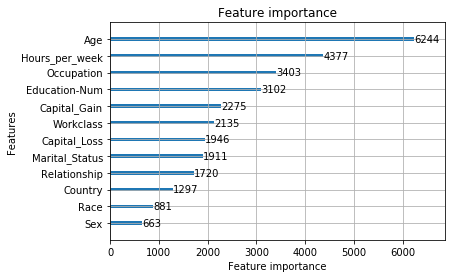

In [6]:
plot_importance(lgbm_model,max_num_features=50)

In [7]:
pred= lgbm_model.predict(val)
pred_prob= lgbm_model.predict_proba(val)

print(precision_score(y_val,pred),recall_score(y_val,pred))
print(roc_auc_score(y_val,pred_prob[:,1]))



0.7331524197195839 0.7020355132091814


0.9239291814173933

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[6870  590]
 [ 688 1621]]


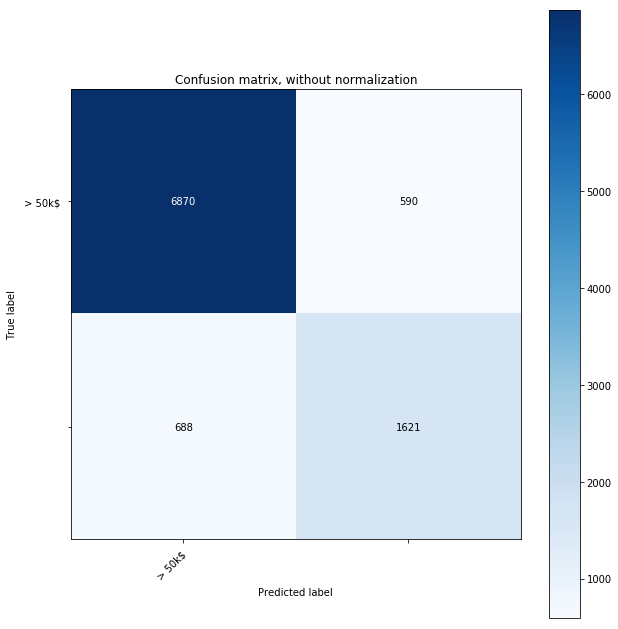

In [9]:
plot_confusion_matrix(y_val,pred,classes=np.array([' < 50k$ ',' > 50k$ ']))

In [11]:
shap_explainer= shap.TreeExplainer(lgbm_model,data =train,feature_dependence='independent',model_output ='probability')

In [12]:
val_shap_values =  shap_explainer.shap_values(val.iloc[:10,:],y_val[:10])

 90%|==================  | 9/10 [01:21<00:09]       

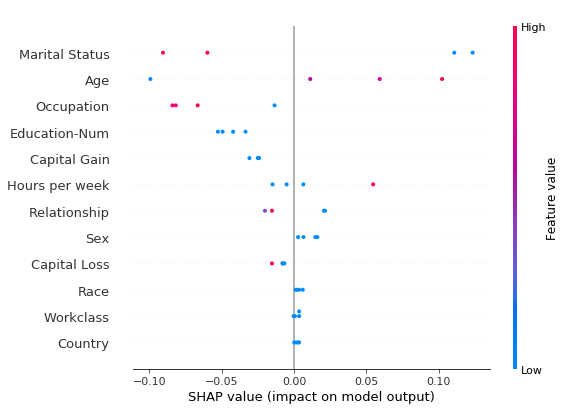

In [45]:
k=1
shap.summary_plot(val_shap_values[2:6],val.iloc[2:6])

In [50]:
val.iloc[0,:]

Age                  32.0
Workclass             4.0
Education-Num        13.0
Marital Status        2.0
Occupation           13.0
Relationship          0.0
Race                  4.0
Sex                   1.0
Capital Gain      15024.0
Capital Loss          0.0
Hours per week       40.0
Country              39.0
Name: 2631, dtype: float64

In [52]:
shap.force_plot(shap_explainer.expected_value,\
               val_shap_values[0,:], val.iloc[0,:])

In [79]:
val_pred = pd.DataFrame(lgbm_model.predict_proba(val))
val_pred.columns = ['negative','positive']
val_pred.reset_index(inplace=True)
def extract_miss_classified(data,t,pred):
    data=data.copy()
    data['true'] = t
    data['pred'] = [p>=0.5 for p in pred]*1
    return data.query('true != pred & true==True')
false_negative = extract_miss_classified(val,y_val,val_pred.positive.values)  


/home/oussama/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [110]:
false_shap_value = shap_explainer.shap_values(false_negative.drop(['true','pred'],axis=1).iloc[:5]\
                                             ,false_negative.true.values[:5])


 80%|================    | 4/5 [00:39<00:09]       

In [87]:
shap.force_plot(shap_explainer.expected_value,false_shap_value[0,:],false_negative.iloc[0,:-2])

In [92]:
encoders_dict['Occupation'].classes_

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [109]:
from collections import Counter
train['target'] = y_train
train['target'].isnull().sum()
print(Counter(train[train['Occupation']==7]['target'].values))


/home/oussama/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Counter({False: 1209, True: 178})